In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
test = pd.read_csv("test.csv")
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [4]:
print(train.shape,test.shape)

(456548, 9) (32573, 8)


In [5]:
meal = pd.read_csv("meal_info.csv")
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
meal.shape

(51, 3)

In [7]:
fulfilment_center_info = pd.read_csv("fulfilment_center_info.csv")
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
fulfilment_center_info.shape

(77, 5)

In [9]:
print(train.shape)
train.head()

(456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [10]:
data = pd.merge(train, fulfilment_center_info, on='center_id')
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [11]:
data.shape

(456548, 13)

In [12]:
all_data = pd.merge(data, meal, on='meal_id')

In [13]:
all_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [14]:
all_data.shape

(456548, 15)

In [15]:
##Statistical Summary of data
all_data.describe(include='all')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548,456548.000000,456548,456548
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,14,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TYPE_A,NaN,Beverages,Italian
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262881,NaN,127890,122925
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,NaN,4.083590,NaN,NaN
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,NaN,1.091686,NaN,NaN
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,NaN,0.900000,NaN,NaN
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,NaN,3.600000,NaN,NaN
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,NaN,4.000000,NaN,NaN
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,NaN,4.500000,NaN,NaN


In [16]:
##Checking Null values
all_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

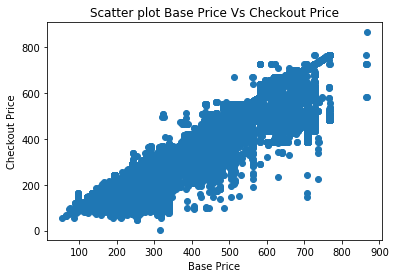

In [17]:
##EDA
import matplotlib.pyplot as plt
plt.scatter(all_data['base_price'], all_data['checkout_price'])
plt.title('Scatter plot Base Price Vs Checkout Price')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.show()

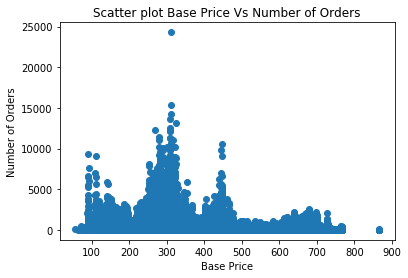

In [18]:
plt.scatter(all_data['base_price'], all_data['num_orders'])
plt.title('Scatter plot Base Price Vs Number of Orders')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')
plt.show()


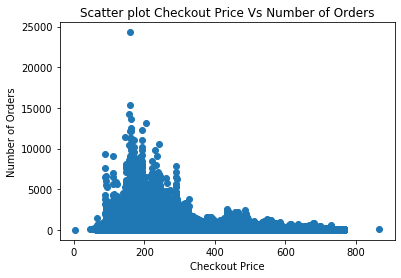

In [19]:
plt.scatter(all_data['checkout_price'], all_data['num_orders'])
plt.title('Scatter plot Checkout Price Vs Number of Orders')
plt.xlabel('Checkout Price')
plt.ylabel('Number of Orders')
plt.show()

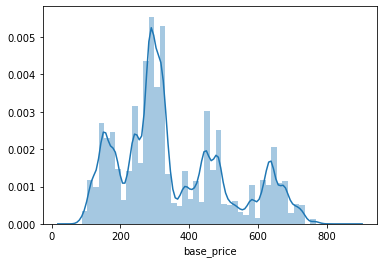

In [20]:
##Distribution Plot
import seaborn as sns
sns.distplot(all_data['base_price'])

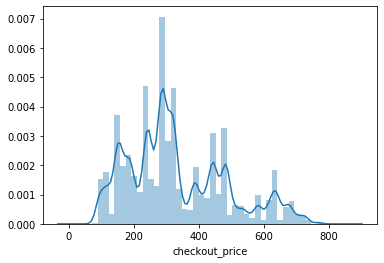

In [21]:
sns.distplot(all_data['checkout_price'])

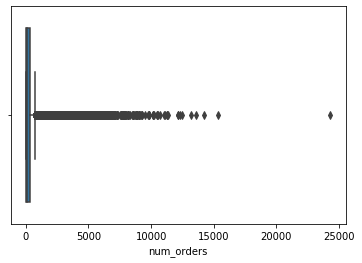

In [22]:
sns.boxplot(all_data['num_orders'])

# Checking Correlation

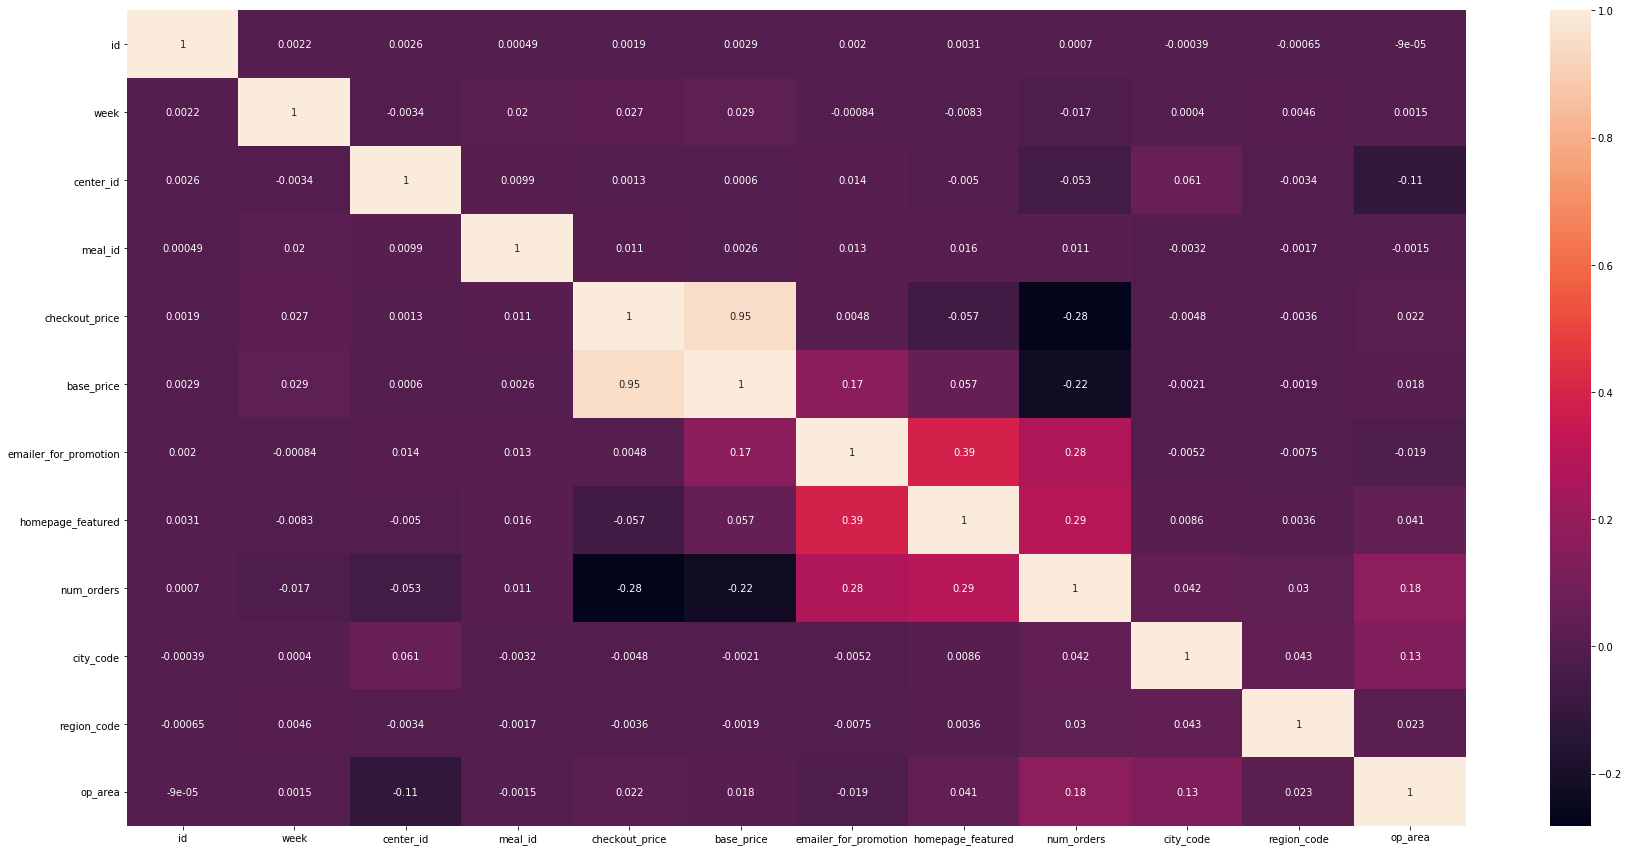

In [23]:
import seaborn as sns
plt.figure(figsize=(30,15))
correlation = all_data.corr()
sns.heatmap(correlation, annot=True)

In [24]:
test_with_ctrs= pd.merge(test,fulfilment_center_info,on='center_id')

In [25]:
test_with_ctrs.shape

(32573, 12)

In [26]:
test_final=pd.merge(test_with_ctrs,meal,on='meal_id')


In [27]:
test_final.shape

(32573, 14)

In [28]:
columns_to_drop=['center_id','meal_id']
all_data.drop(labels=columns_to_drop,axis=1,inplace=True)
test.drop(labels=columns_to_drop,axis=1,inplace=True)
all_data.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [29]:
df_final = all_data.copy()
df_final.shape

(456548, 13)

In [30]:
df_final_dummies=pd.get_dummies(df_final)
test=pd.get_dummies(test_final)
test.T.head(31)

,0,1,2,3,4,5,6,7,8,9,...,32563,32564,32565,32566,32567,32568,32569,32570,32571,32572
id,1028232.00,1262649.00,1453211.00,1262599.00,1495848.00,1342607.00,1358429.00,1475006.00,1009709.00,1460444.00,...,1460911.00,1436368.00,1006634.00,1226340.00,1402413.00,1412025.00,1287019.00,1396176.00,1331977.00,1017414.00
week,146.00,147.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,...,150.00,151.00,152.00,153.00,155.00,146.00,147.00,149.00,150.00,152.00
center_id,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,24.00,...,51.00,51.00,51.00,51.00,51.00,61.00,61.00,61.00,61.00,61.00
meal_id,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,...,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00
checkout_price,158.11,159.11,157.14,159.14,160.11,159.11,159.11,160.11,158.11,158.11,...,581.03,582.03,581.03,581.03,680.03,583.03,582.03,629.53,629.53,630.53
base_price,159.11,159.11,158.14,157.14,159.11,160.11,158.11,158.11,159.11,160.11,...,582.03,582.03,581.03,581.03,678.03,581.03,582.03,629.53,629.53,631.53
emailer_for_promotion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
homepage_featured,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
city_code,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,614.00,...,638.00,638.00,638.00,638.00,638.00,473.00,473.00,473.00,473.00,473.00
region_code,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,85.00,...,56.00,56.00,56.00,56.00,56.00,77.00,77.00,77.00,77.00,77.00


In [32]:
df_final_dummies=pd.get_dummies(df_final)
test_final_dummies=pd.get_dummies(test_final)
test_final_dummies.T.head(31)


,0,1,2,3,4,5,6,7,8,9,...,32563,32564,32565,32566,32567,32568,32569,32570,32571,32572
id,1028232.00,1262649.00,1453211.00,1262599.00,1495848.00,1342607.00,1358429.00,1475006.00,1009709.00,1460444.00,...,1460911.00,1436368.00,1006634.00,1226340.00,1402413.00,1412025.00,1287019.00,1396176.00,1331977.00,1017414.00
week,146.00,147.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,...,150.00,151.00,152.00,153.00,155.00,146.00,147.00,149.00,150.00,152.00
center_id,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,24.00,...,51.00,51.00,51.00,51.00,51.00,61.00,61.00,61.00,61.00,61.00
meal_id,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,...,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00,2104.00
checkout_price,158.11,159.11,157.14,159.14,160.11,159.11,159.11,160.11,158.11,158.11,...,581.03,582.03,581.03,581.03,680.03,583.03,582.03,629.53,629.53,630.53
base_price,159.11,159.11,158.14,157.14,159.11,160.11,158.11,158.11,159.11,160.11,...,582.03,582.03,581.03,581.03,678.03,581.03,582.03,629.53,629.53,631.53
emailer_for_promotion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
homepage_featured,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
city_code,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,614.00,...,638.00,638.00,638.00,638.00,638.00,473.00,473.00,473.00,473.00,473.00
region_code,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,85.00,...,56.00,56.00,56.00,56.00,56.00,77.00,77.00,77.00,77.00,77.00


In [33]:
y=df_final_dummies['num_orders']
X=df_final_dummies.drop(['num_orders'],axis=1)
X_test=test_final_dummies
display(X.head())
X_test.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,136.83,152.29,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1018704,2,135.83,152.29,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1196273,3,132.92,133.92,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1116527,4,135.86,134.86,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1343872,5,146.50,147.50,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,...,0,0,0,0,0,0,0,0,0,1
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,...,0,0,0,0,0,0,0,0,0,1
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,...,0,0,0,0,0,0,0,0,0,1
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,...,0,0,0,0,0,0,0,0,0,1
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,...,0,0,0,0,0,0,0,0,0,1


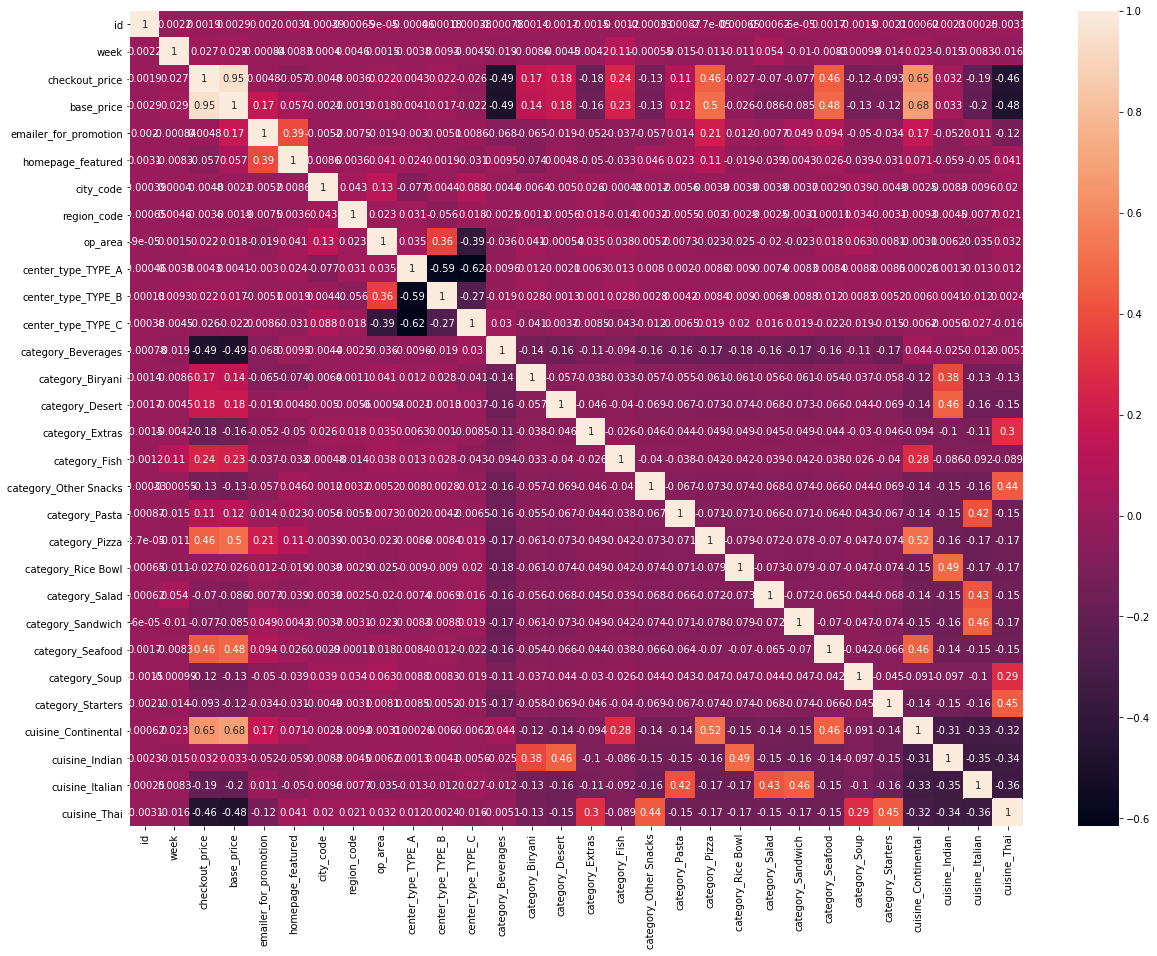

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 15))

sns.heatmap(X.corr(), annot=True)

In [37]:
Pred_id=X_test.id
columns_to_drop=['base_price','id']
X.drop(['base_price'],axis=1,inplace=True)
X_test.drop(['base_price'],axis=1,inplace=True)

In [49]:
X.drop(['id'],axis=1,inplace=True)
X_test.drop(['id'],axis=1,inplace=True)

In [44]:
X_test.drop(['center_id','meal_id'],axis=1,inplace=True)

In [50]:
print(X.shape,X_test.shape)

(456548, 28) (32573, 28)


In [43]:
X_test.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,55,1885,158.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
1,1262649,147,55,1885,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
2,1453211,149,55,1885,157.14,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
3,1262599,150,55,1885,159.14,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
4,1495848,151,55,1885,160.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1


# Random Forest

In [51]:

from sklearn.ensemble import RandomForestRegressor
mm=RandomForestRegressor(n_jobs= -1,n_estimators=200,oob_score=True)


In [52]:
mm.fit(X.values,np.array(y))
print("Model Fitted")

Model Fitted


In [53]:
y_preds=mm.predict(X_test.values)
np.sum(y_preds<0)

0

# Creating Submission file

In [54]:
submission=pd.read_csv("sample_submission_hSlSoT6.csv")
submission.head()
submission['id']=Pred_id
submission['num_orders']=y_preds
pd.DataFrame(submission, columns=['id','num_orders']).to_csv('RandomForest2.csv',index=False)

## Creating copy

In [37]:
data_cp = all_data.copy()
data_cp.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


## Label Encoding

In [38]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()
data_cp["make_Cent_type"] = lb_enc.fit_transform(data_cp["center_type"])
data_cp[["center_type", "make_Cent_type"]].head(10)

,center_type,make_Cent_type
0,TYPE_C,2
1,TYPE_C,2
2,TYPE_C,2
3,TYPE_C,2
4,TYPE_C,2
5,TYPE_C,2
6,TYPE_C,2
7,TYPE_C,2
8,TYPE_C,2
9,TYPE_C,2


In [39]:
data_cp["make_category"] = lb_enc.fit_transform(data_cp["category"])
data_cp[["category", "make_category"]].head(10)

,category,make_category
0,Beverages,0
1,Beverages,0
2,Beverages,0
3,Beverages,0
4,Beverages,0
5,Beverages,0
6,Beverages,0
7,Beverages,0
8,Beverages,0
9,Beverages,0


In [40]:
data_cp["make_cuisine"] = lb_enc.fit_transform(data_cp["cuisine"])
data_cp[["cuisine", "make_cuisine"]].head(10)

,cuisine,make_cuisine
0,Thai,3
1,Thai,3
2,Thai,3
3,Thai,3
4,Thai,3
5,Thai,3
6,Thai,3
7,Thai,3
8,Thai,3
9,Thai,3


In [41]:
cp_data = data_cp.drop(['center_type','category','cuisine'], axis=1)

In [42]:
cp_data.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
op_area                  float64
make_Cent_type             int64
make_category              int64
make_cuisine               int64
dtype: object

In [43]:
##Traning and Testing data spliting
X = cp_data.drop('num_orders', axis=1)
y = cp_data['num_orders']

In [44]:
print(X.shape,y.shape)

(456548, 14) (456548,)


# Modeling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Linear Regression

In [46]:
###Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [47]:
print('Coefficient of model :', lin_reg_model.coef_)
print('Intercept of model :',lin_reg_model.intercept_)


Coefficient of model : [ 3.67145717e-06 -7.37193393e-02 -3.41949555e-01  8.74095996e-05
 -4.45655190e-01 -7.17848189e-01  2.99828300e+02  2.67810500e+02
  1.21813354e-01  6.04169602e-01  6.22874718e+01 -3.35482005e+00
  1.41783957e+01 -6.82875767e+01]
Intercept of model : 312.17412573662745


In [48]:
# Root Mean Squared Error on training dataset
predict_train = lin_reg_model.predict(X_train)
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)



RMSE on train dataset :  345.12525232967226


In [49]:
## prediction on test data splitting from metadata
predict_test = lin_reg_model.predict(X_test)
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  340.8045133944632


# Decision Tree

In [50]:
dec_reg_model = DecisionTreeRegressor(random_state=1)
dec_reg_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [51]:
x_pred_dec = dec_reg_model.predict(X_test)
print("Mean Squared Log Error is ", mean_squared_log_error(y_test, x_pred_dec))

Mean Squared Log Error is  0.4320911234223391


In [52]:
print("Root Mean Squared Error is ", mean_squared_error(y_test, x_pred_dec)**(0.5))

Root Mean Squared Error is  213.9222032937827


# Random Forest Regressor

In [54]:
ran_reg_model = RandomForestRegressor(random_state=1)
ran_reg_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
## prediction on test data splitting from metadata
x_pred_ran = ran_reg_model.predict(X_test)
print("Mean Squared Log Error is ", mean_squared_log_error(y_test, x_pred_ran))

In [ ]:
print("Root Mean Squared Error is ", mean_squared_error(y_test, x_pred_ran)**(0.5))


In [55]:
# ## prediction on test data
predict_test = lin_reg_model.predict(test)
rmse_test = mean_squared_error(test.id,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 8)

In [56]:
X.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'op_area', 'make_Cent_type', 'make_category',
       'make_cuisine'],
      dtype='object')

In [ ]:
# Output file

In [ ]:
# ##File creation for submission
# final_out = pd.DataFrame({'id': test.id,'num_orders': x_pred_dec})
# final_out.to_csv('submission.csv', index=False)